In [3]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

In [51]:
centers = [[1,1,1],[5,5,5],[10,10,10]]

In [74]:
X, Y = make_blobs(n_samples = 20, centers = centers, cluster_std = 1.5)#std. deviation ^, increases graph density

In [75]:
print(X)


[[ 5.81046404  4.54481921  6.0890672 ]
 [ 3.67946225  3.59324673  5.13818936]
 [ 3.30100312  5.59651504  4.39306357]
 [-0.40808502 -1.34791592  3.73756915]
 [ 1.58032804  3.49599765  1.89856132]
 [ 0.58001054 -2.07617815  1.69095106]
 [12.42703361 11.58588129 10.40778254]
 [ 1.65060238  0.61462563 -1.59527357]
 [ 1.94536055  0.86569333  1.0025328 ]
 [ 5.09608002  5.19231203  1.71447053]
 [ 4.99740497  4.03465554  4.69959866]
 [ 0.34591031  0.53206585  2.33639266]
 [11.07033505  8.91926628 10.29277226]
 [ 9.89590773 10.77138464 10.57111442]
 [-0.74998145  1.75230302  1.2529479 ]
 [ 9.29339197 11.3315312  10.52591004]
 [ 9.51778923  9.79647963 11.06412948]
 [ 6.1166568   2.05872978  3.00095574]
 [14.33531548  8.80196547 12.09104766]
 [ 3.34556696  5.00981487  3.22608241]]


In [79]:
ms = MeanShift()

In [80]:

ms.fit(X)
labels = ms.labels_
print(labels)
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)


[0 0 0 1 1 1 2 1 1 0 0 1 2 2 1 2 2 0 2 0]
[[ 4.24087077  4.19076136  3.7699986 ]
 [ 0.70630648  0.54808449  1.47481162]
 [11.08996218 10.20108475 10.8254594 ]]
Number of estimated clusters: 3


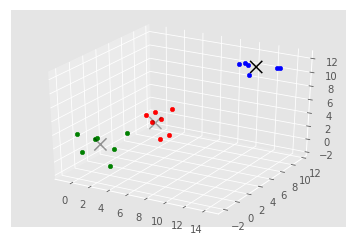

In [81]:

colors = 10*['r','g','b','c','k','y','m']#10* means multiplying list itself by 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()
#ax.show()

WITH TITANIC DATASET

In [83]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)#data stored in pandas=dataframe
df.drop(['body','name'], 1, inplace=True) 
df.fillna(0,inplace=True)#fill non-available 

def handle_non_numerical_data(df):#took unique value from every column and sequentially numbered it 
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))
            #converting list to 1 & 0 by referencing dictionary value of key
    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [84]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
print(labels)
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[0 2 2 ... 0 0 0]
[[ 0.32903608  0.23561353 -0.10000925 -0.23135378 -0.27032175 -0.35550444
  -0.38711872 -0.19086496 -0.37966035]
 [-1.54609786 -0.30074929  0.97374665 -0.47908676  0.1328818   9.26124543
   0.20808052  1.64166743  0.48321936]
 [-1.54609786 -0.30074929  1.954745    0.48128777  3.60016958  4.43513362
   0.71477904  0.72016543 -0.15811016]
 [ 0.84191642 -0.30074929 -1.35790158  0.48128777  9.95686385  0.70136971
  -0.44954947 -0.20133657 -0.61620267]]
Number of estimated clusters: 4


In [85]:
original_df['cluster_group']=np.nan


In [86]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

/home/sambbhav/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.37129109863672816, 1: 1.0, 2: 0.6666666666666666, 3: 0.1}


In [88]:
print(original_df[ (original_df['cluster_group']==0) ])


      pclass  survived                                              name  \
0          1         1                     Allen, Miss. Elisabeth Walton   
5          1         1                               Anderson, Mr. Harry   
6          1         1                 Andrews, Miss. Kornelia Theodosia   
7          1         0                            Andrews, Mr. Thomas Jr   
8          1         1     Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                           Artagaveytia, Mr. Ramon   
12         1         1                     Aubart, Mme. Leontine Pauline   
13         1         1                      Barber, Miss. Ellen "Nellie"   
14         1         1              Barkworth, Mr. Algernon Henry Wilson   
15         1         0                               Baumann, Mr. John D   
18         1         1                             Bazzani, Miss. Albina   
19         1         0                              Beattie, Mr. Thomson   
20         1